In [9]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob
import itertools
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

In [10]:
period = 5
dealias = 2 / 3
dx = 2 * 3.0 / 256
kmax = dealias * 2 * np.pi / dx
eta = 0.5 * dealias / kmax
print(eta)
print(dealias / eta)
data_folder = 'data'
line_styles = ['k-', 'k--', 'k-.', 'k:']

0.0018650969893581485
357.4434308084387


<>:59: SyntaxWarning: invalid escape sequence '\e'
<>:62: SyntaxWarning: invalid escape sequence '\e'
<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:59: SyntaxWarning: invalid escape sequence '\e'
<>:62: SyntaxWarning: invalid escape sequence '\e'
<>:65: SyntaxWarning: invalid escape sequence '\e'
<>:66: SyntaxWarning: invalid escape sequence '\e'
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/924973614.py:59: SyntaxWarning: invalid escape sequence '\e'
  ax1.set_xlabel('$k_h \eta$')
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/924973614.py:62: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$k_z \eta$')
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/924973614.py:65: SyntaxWarning: invalid escape sequence '\e'
  fig1.suptitle(f'Horizontal energy spectra for {kmax_str}$\eta = 1.0$')
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/924973614.py:6

10 files found.
5 files kept.
['data/ns3d.strat_256x256x64_V3x3x0.75_N0001_1.0/spectra1d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0050_1.0/spectra1d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0200_1.0/spectra1d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0500_1.0/spectra1d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N1000_1.0/spectra1d.h5']


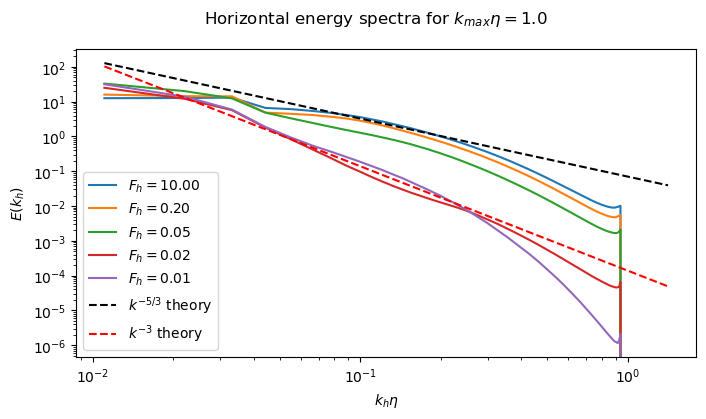

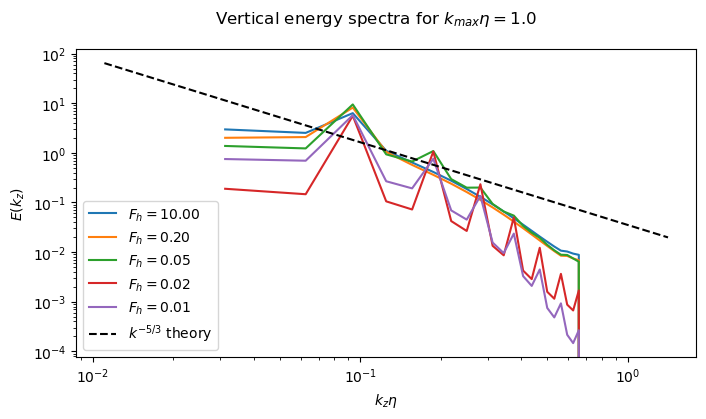

In [12]:
file_name = 'spectra1d.h5'

files = sorted(glob.glob(data_folder + "/ns3d.strat*_1.0/" + file_name))
print(f"{len(files)} files found.")

to_remove = {"N0002", "N0020", "N0010", "N0005", "N0100"}
files = [f for f in files if not any(n in f for n in to_remove)]

print(f"{len(files)} files kept.")
print(files)

k53 = False

kmax_str = r"$k_{max}$"

line_style_cycle = itertools.cycle(line_styles)

fig1, ax1 = plt.subplots(1,figsize=(8, 4))
fig2, ax2 = plt.subplots(1,figsize=(8, 4))

for file in files:
    N = float(file.split('/')[1].split('_')[3].replace('N', ''))/10
    kmax_eta = float(file.split('/')[1].split('_')[4])
    eta = kmax_eta / kmax
    diss_length = dealias *  np.pi / eta
    
    with h5py.File(file, 'r') as hdf_file:
        kx = dealias * hdf_file['kx'][:]
        ky = dealias * hdf_file['ky'][:]
        kz = dealias * hdf_file['kz'][:]
        spectra_E_kx = hdf_file['spectra_E_kx'][:]
        spectra_E_ky = hdf_file['spectra_E_ky'][:]
        spectra_E_kz = hdf_file['spectra_E_kz'][:]
        times = hdf_file['times'][:]
        
    kh = np.sqrt(kx**2 + ky**2)    
    spectra_E_kh = np.sqrt(spectra_E_kx**2 + spectra_E_ky**2)
    
    filtered_spectra_E_kh = spectra_E_kh[times > period]
    filtered_spectra_E_kz = spectra_E_kz[times > period]

    spectra_E_kh_mean = np.sum(filtered_spectra_E_kh, axis=0)
    spectra_E_kz_mean = np.sum(filtered_spectra_E_kz, axis=0)
        
    if k53:
        power = 5/3
    else:
        power = 0
        
    line_style = next(line_style_cycle)
    
    ax1.loglog(kh[1:] * eta, spectra_E_kh_mean[1:] * kh[1:]**(power), label=f'$F_h = {1/N:.2f}$')
    ax2.loglog(kz[1:] * eta, spectra_E_kz_mean[1:] * kz[1:]**(power), label=f'$F_h = {1/N:.2f}$')

ax1.loglog(kh[1:] * eta, 10**2.6 * kh[1:]**(-5/3), 'k--', label='$k^{-5/3}$ theory')
ax1.loglog(kh[1:] * eta, 10**2.9 * kh[1:]**(-3), 'r--', label='$k^{-3}$ theory')
ax2.loglog(kh[1:] * eta, 10**2.3 * kh[1:]**(-5/3), 'k--', label='$k^{-5/3}$ theory')

ax1.set_xlabel('$k_h \eta$')
ax1.set_ylabel('$E(k_h)$')
    
ax2.set_xlabel('$k_z \eta$')
ax2.set_ylabel('$E(k_z)$')

fig1.suptitle(f'Horizontal energy spectra for {kmax_str}$\eta = 1.0$')
fig2.suptitle(f'Vertical energy spectra for {kmax_str}$\eta = 1.0$')

ax1.legend()
fig1.show()


ax2.legend()
fig2.show()

28 files found.
['data/ns3d.strat_256x256x64_V3x3x0.75_N1000_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0500_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0200_3.1/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0200_1.5/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0200_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0200_0.5/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0100_3.1/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0100_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0100_0.5/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0050_3.1/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0050_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0050_0.5/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0020_3.1/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0020_1.0/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_N0020_0.5/spectra3d.h5', 'data/ns3d.strat_256x256x64_V3x3x0.75_

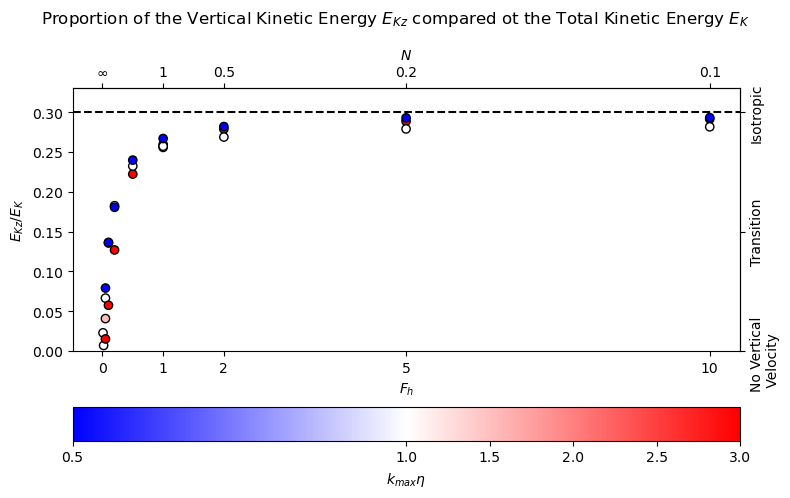

In [16]:
file_name = 'spectra3d.h5'
files = sorted(glob.glob(data_folder + "/ns3d.strat*/" + file_name))
files.reverse()
print(f"{len(files)} files found.")
print(files)

Froude_values = []
Ekz_over_Ek = []
kmax_eta_values = []

time = 10

for file in files:
    N = float(file.split('/')[1].split('_')[3].replace('N', '')) / 10
    if N == 0:  # Avoid division by zero
        continue
    Froude = 1 / N
    Froude_values.append(Froude)
    kmax_eta = float(file.split('/')[1].split('_')[4])
    kmax_eta_values.append(kmax_eta)
    
    with h5py.File(file, 'r') as hdf_file:
        k_spectra3d = dealias * hdf_file['k_spectra3d'][:]
        spectra_E = hdf_file['spectra_E'][:]
        spectra_w = hdf_file['spectra_vz'][:]
        times = hdf_file['times'][:]
    
    Ek = np.mean(spectra_E, axis=1)
    Ekz = np.mean(spectra_w, axis=1)
    
    Ek_mean = np.mean(Ek[times > time])
    Ekz_mean = np.mean(Ekz[times > time])

    Ekz_over_Ek.append(Ekz_mean / Ek_mean)
    

fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

ax.axhline(0.3, color='k', linestyle='--')

vmin, vmax = 0.5, 3.0
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=1.0, vmax=vmax)
cmap = cm.bwr

colors = [cmap(norm(k)) for k in kmax_eta_values]

# Scatter plot with colormap
sc = ax.scatter(Froude_values, Ekz_over_Ek, c=kmax_eta_values, cmap=cmap, norm=norm, edgecolors='black')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
cbar.set_label(r'$k_{max} \eta$')


custom_ticks = [0, 1, 2, 5, 10]
custom_labels = [0, 1, 2, 5, 10]
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_labels)

ax.set_xlabel('$F_h$')
ax.set_ylabel(r'$E_{Kz}/E_K$')

ax.set_ylim((0, 0.33))

secaxx = ax.secondary_xaxis('top')
custom_ticks = [0, 1, 2, 5, 10]
custom_labels = [r'$\infty$', '1', '0.5', '0.2', '0.1']

secaxx.set_xticks(custom_ticks)
secaxx.set_xticklabels(custom_labels)
secaxx.set_xlabel("$N$")

secaxy = ax.secondary_yaxis('right')
custom_ticks = [0, 0.15, 0.30]
custom_labels = ['No Vertical \n Velocity','Transition','Isotropic']

secaxy.set_yticks(custom_ticks)
secaxy.set_yticklabels(custom_labels, rotation=90, va='center')

fig.suptitle('Proportion of the Vertical Kinetic Energy $E_{Kz}$ compared ot the Total Kinetic Energy $E_K$')

plt.tight_layout()
plt.show()

In [5]:
nu = 2.296e-04
#nu = 4.296e-04
epsilon = 0.5
kmin, kmax = 3, 4
Lmax, Lmin = 2 * np.pi/ kmin, 2 * np.pi/ kmax

Remax, Remin = (epsilon)**(1/3) * Lmax**(4/3)/nu, (epsilon)**(1/3) * Lmin**(4/3)/nu

print(Lmax,Lmin)
print(Remin, Remax)

2.0943951023931953 1.5707963267948966
6312.159345457998 9263.240418725614


<>:42: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\e'
<>:43: SyntaxWarning: invalid escape sequence '\e'
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/344908748.py:42: SyntaxWarning: invalid escape sequence '\e'
  ax1.loglog(kh[1:], spectra_E_kh_mean[1:], label=kmax_str + f"$\eta = {kmax_eta}$")
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/344908748.py:43: SyntaxWarning: invalid escape sequence '\e'
  ax2.loglog(kz[1:], spectra_E_kz_mean[1:], label=kmax_str + f"$\eta = {kmax_eta}$")


6 files found.
['data/ns3d_256x256x64_V3x3x0.75_N0000_0.5/spectra1d.h5', 'data/ns3d_256x256x64_V3x3x0.75_N0000_0.8/spectra1d.h5', 'data/ns3d_256x256x64_V3x3x0.75_N0000_1.0/spectra1d.h5', 'data/ns3d_256x256x64_V3x3x0.75_N0000_1.5/spectra1d.h5', 'data/ns3d_256x256x64_V3x3x0.75_N0000_2.0/spectra1d.h5', 'data/ns3d_256x256x64_V3x3x0.75_N0000_3.0/spectra1d.h5']
data/ns3d_256x256x64_V3x3x0.75_N0000_0.5/spectra1d.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_0.8/spectra1d.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_1.0/spectra1d.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_1.5/spectra1d.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_2.0/spectra1d.h5
data/ns3d_256x256x64_V3x3x0.75_N0000_3.0/spectra1d.h5


/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/344908748.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/var/folders/np/43rq4vzs0js_3z1xt5mx73hr0000gn/T/ipykernel_21601/344908748.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


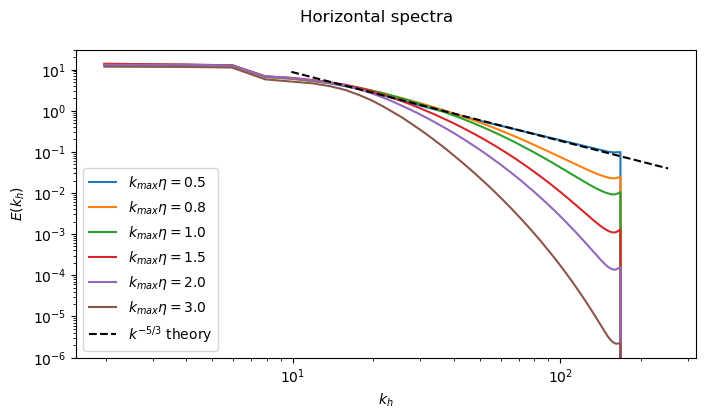

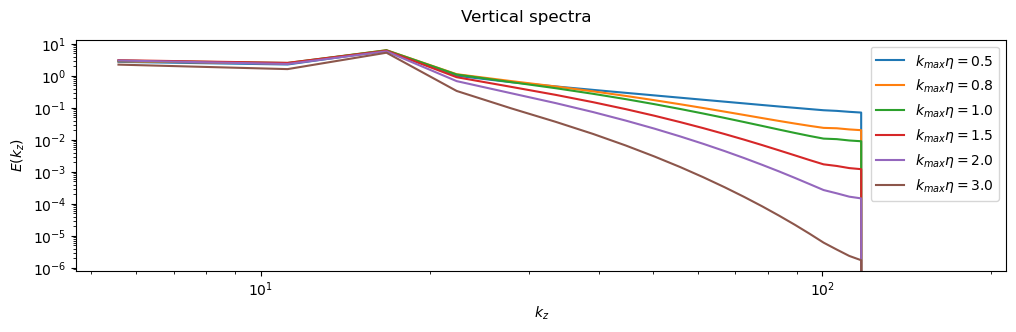

In [17]:
file_name = 'spectra1d.h5'

files = sorted(glob.glob(data_folder + "/ns3d*N0000*/" + file_name))
print(f"{len(files)} files found.")
print(files)

kmax_str = r"$k_{max}$"

k53 = False

line_style_cycle = itertools.cycle(line_styles)

fig1, ax1 = plt.subplots(1,figsize=(8, 4), facecolor='none')
fig2, ax2 = plt.subplots(1,figsize=(12, 3), facecolor='none')

for file in files:
    print(file)
    N = float(file.split('/')[1].split('_')[3].replace('N', ''))/10
    kmax_eta = float(file.split('/')[1].split('_')[4])
    eta = kmax_eta / kmax
    
    with h5py.File(file, 'r') as hdf_file:
        kx = dealias * hdf_file['kx'][:]
        ky = dealias * hdf_file['ky'][:]
        kz = dealias * hdf_file['kz'][:]
        spectra_E_kx = hdf_file['spectra_E_kx'][:]
        spectra_E_ky = hdf_file['spectra_E_ky'][:]
        spectra_E_kz = hdf_file['spectra_E_kz'][:]
        times = hdf_file['times'][:]
        
    kh = np.sqrt(kx**2 + ky**2)    
    spectra_E_kh = np.sqrt(spectra_E_kx**2 + spectra_E_ky**2)
    
    filtered_spectra_E_kh = spectra_E_kh[times > period]
    filtered_spectra_E_kz = spectra_E_kz[times > period]

    spectra_E_kh_mean = np.sum(filtered_spectra_E_kh, axis=0)
    spectra_E_kz_mean = np.sum(filtered_spectra_E_kz, axis=0)
        
    line_style = next(line_style_cycle)
        
    ax1.loglog(kh[1:], spectra_E_kh_mean[1:], label=kmax_str + f"$\eta = {kmax_eta}$")
    ax2.loglog(kz[1:], spectra_E_kz_mean[1:], label=kmax_str + f"$\eta = {kmax_eta}$")
    

    ax1.set_xlabel('$k_h$')
    ax1.set_ylabel('$E(k_h)$')
    
    ax2.set_xlabel('$k_z$')
    ax2.set_ylabel('$E(k_z)$')
    
ax1.loglog(kh[5:], 10**2.6 * kh[5:]**(-5/3), 'k--', label='$k^{-5/3}$ theory')

ax1.legend()
fig1.suptitle('Horizontal spectra')
fig1.show()

ax2.legend()
fig2.suptitle('Vertical spectra')
fig2.show()